In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.model_selection import train_test_split
import torch

import sys
sys.path.append('C:/Users/bcspr/OneDrive/Desktop/helper functions')
from helper_functions import accuracy_fn

pd.set_option('display.max_columns', 100)

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [110]:
data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/refresher project/salary.csv')
df = data.copy()

In [111]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [113]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Text(0.5, 1.0, 'Education Distrabution')

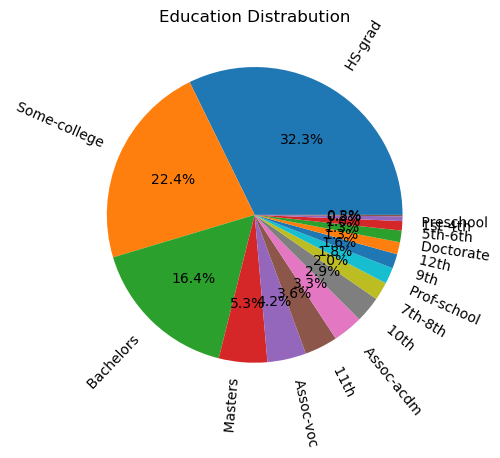

In [114]:
fig, ax = plt.subplots()
edu_values = df['education'].value_counts()


ax.pie(edu_values, 
       labels= edu_values.index,
       autopct='%1.1f%%',
       rotatelabels= True)
ax.set_title('Education Distrabution')

In [115]:
df['salary_binary'] = df['salary'].apply(lambda x: 1 if x.strip() == '<=50K' else 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


([<matplotlib.patches.Wedge at 0x1c92662a7d0>,
 [Text(-0.7999477838977984, 0.7550387692277803, '1'),
  Text(0.7999477838977981, -0.7550387692277808, '0')])

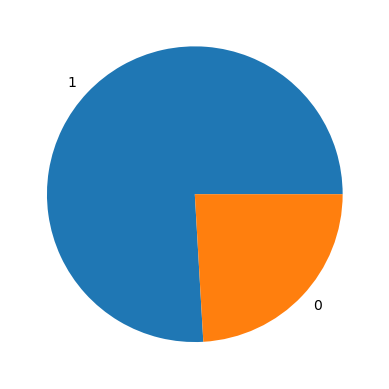

In [116]:
fig, ax = plt.subplots()
value_counts = df['salary_binary'].value_counts()
ax.pie(value_counts,
       labels= value_counts.index)

In [117]:
df_trimmed = df.drop(['education', 'salary','fnlwgt'], axis= 1 )

In [118]:

df_trimmed = df_trimmed.copy()
df_trimmed.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_binary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [119]:
X = df_trimmed.drop('salary_binary', axis= 1)
y = df_trimmed['salary_binary']

In [120]:
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [121]:
X.dtypes


age                int64
workclass         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [122]:
df['occupation'] = df['occupation'].str.strip().replace('?', 'Not-Specified')

In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

categories = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([('one_hot',
                                   one_hot,
                                   categories)],
                                 remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<32561x91 sparse matrix of type '<class 'numpy.float64'>'
	with 329841 stored elements in Compressed Sparse Row format>

In [124]:
dense_array = transformed_X.toarray()
dense_array


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [125]:
# spliting into train and test split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,
                                                    random_state= 42,
                                                    shuffle= True)


In [126]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model_0 = tree.DecisionTreeClassifier()


In [127]:
model_0.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
from sklearn.metrics import accuracy_score
predictions = model_0.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"accuracy: {accuracy}")

accuracy: 0.8252057486795235


In [129]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from scipy import sparse
from tqdm import tqdm

In [130]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [131]:
X_train_tensor = torch.tensor(X_train_dense, dtype= torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_dense, dtype= torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype= torch.float32)



len(X_train_tensor), len(y_train_tensor), len(X_test_tensor), len(y_test_tensor)

(24420, 24420, 8141, 8141)

In [200]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(SimpleClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_units, hidden_units)
        self.layer3 = nn.Linear(hidden_units,output_size)
     
    def forward(self,x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return(x)
model_2 = SimpleClassifier(input_size=91, hidden_units=100, output_size= 1).to(device)

In [201]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size= batch_size, shuffle= True)
test_dataloader = DataLoader(test_dataset, batch_size= batch_size, shuffle= False)



print(X_train_tensor.shape[1]), print(X_test_tensor.shape[1])

91
91


(None, None)

In [202]:
optimizer = optim.Adam(model_2.parameters(), lr= .001)

loss_function = nn.BCEWithLogitsLoss()

In [203]:
import pandas as pd

# Define the number of epochs
epochs = 1000

# Initialize best performance variables
best_train_loss, best_train_acc = float('inf'), 0.0
best_test_loss, best_test_acc = float('inf'), 0.0

# Initialize an empty list to store epoch-wise metrics
epoch_metrics = []

# Loop through the epochs
for epoch in tqdm(range(epochs)):
    model_2.train()
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_function(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_2.eval()
    with torch.no_grad():
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
        # Print metrics periodically
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")
        
        # Track best performance
        if test_loss < best_test_loss:
            best_train_loss = loss.item()
            best_train_acc = acc
            best_test_loss = test_loss.item()
            best_test_acc = test_acc
        
        # Store epoch-wise metrics
        epoch_metrics.append({
            'Epoch': epoch,
            'Train Loss': loss.item(),
            'Train Acc': acc,
            'Test Loss': test_loss.item(),
            'Test Acc': test_acc
        })

# Create a DataFrame from epoch-wise metrics
model_2_df_2 = pd.DataFrame(epoch_metrics)

  0%|          | 4/1000 [00:00<00:27, 36.27it/s]

Epoch: 0 | Train Loss: 2.32895 | Train Acc: 35.00 | Test Loss: 3.43159 | Test Acc: 33.50


  4%|▍         | 43/1000 [00:00<00:05, 172.90it/s]

Epoch: 10 | Train Loss: 4.19411 | Train Acc: 77.78 | Test Loss: 4.08983 | Test Acc: 78.21
Epoch: 20 | Train Loss: 1.12066 | Train Acc: 77.81 | Test Loss: 1.03327 | Test Acc: 78.59
Epoch: 30 | Train Loss: 1.17325 | Train Acc: 77.79 | Test Loss: 1.10298 | Test Acc: 78.30
Epoch: 40 | Train Loss: 1.06176 | Train Acc: 77.83 | Test Loss: 0.84540 | Test Acc: 78.61
Epoch: 50 | Train Loss: 0.70033 | Train Acc: 77.83 | Test Loss: 0.55510 | Test Acc: 78.70
Epoch: 60 | Train Loss: 0.79337 | Train Acc: 77.85 | Test Loss: 0.63145 | Test Acc: 78.79
Epoch: 70 | Train Loss: 0.63837 | Train Acc: 78.02 | Test Loss: 0.56728 | Test Acc: 79.71


 12%|█▏        | 116/1000 [00:00<00:03, 285.47it/s]

Epoch: 80 | Train Loss: 0.98282 | Train Acc: 77.79 | Test Loss: 0.88041 | Test Acc: 78.33
Epoch: 90 | Train Loss: 1.00847 | Train Acc: 77.85 | Test Loss: 0.84977 | Test Acc: 78.70
Epoch: 100 | Train Loss: 0.90539 | Train Acc: 77.99 | Test Loss: 0.77821 | Test Acc: 78.81
Epoch: 110 | Train Loss: 0.78524 | Train Acc: 78.26 | Test Loss: 0.70929 | Test Acc: 78.63
Epoch: 120 | Train Loss: 0.86204 | Train Acc: 78.37 | Test Loss: 0.76950 | Test Acc: 78.69
Epoch: 130 | Train Loss: 0.59951 | Train Acc: 78.48 | Test Loss: 0.54046 | Test Acc: 81.16
Epoch: 140 | Train Loss: 0.58541 | Train Acc: 80.85 | Test Loss: 0.90921 | Test Acc: 81.56


 19%|█▊        | 187/1000 [00:00<00:02, 321.88it/s]

Epoch: 150 | Train Loss: 1.17863 | Train Acc: 76.19 | Test Loss: 0.50080 | Test Acc: 80.89
Epoch: 160 | Train Loss: 0.63811 | Train Acc: 76.71 | Test Loss: 0.47634 | Test Acc: 79.02
Epoch: 170 | Train Loss: 0.42804 | Train Acc: 82.30 | Test Loss: 0.46179 | Test Acc: 82.50
Epoch: 180 | Train Loss: 0.38455 | Train Acc: 82.84 | Test Loss: 0.35965 | Test Acc: 84.04
Epoch: 190 | Train Loss: 0.36646 | Train Acc: 83.17 | Test Loss: 0.35624 | Test Acc: 84.15
Epoch: 200 | Train Loss: 0.36127 | Train Acc: 83.76 | Test Loss: 0.35121 | Test Acc: 84.56
Epoch: 210 | Train Loss: 0.35519 | Train Acc: 83.93 | Test Loss: 0.34759 | Test Acc: 85.01
Epoch: 220 | Train Loss: 0.35171 | Train Acc: 84.29 | Test Loss: 0.34537 | Test Acc: 84.99


 30%|███       | 304/1000 [00:01<00:01, 362.85it/s]

Epoch: 230 | Train Loss: 0.34923 | Train Acc: 84.34 | Test Loss: 0.34225 | Test Acc: 85.28
Epoch: 240 | Train Loss: 0.34690 | Train Acc: 84.53 | Test Loss: 0.34018 | Test Acc: 85.43
Epoch: 250 | Train Loss: 0.34466 | Train Acc: 84.58 | Test Loss: 0.33815 | Test Acc: 85.44
Epoch: 260 | Train Loss: 0.34263 | Train Acc: 84.69 | Test Loss: 0.33613 | Test Acc: 85.64
Epoch: 270 | Train Loss: 0.34070 | Train Acc: 84.80 | Test Loss: 0.33442 | Test Acc: 85.70
Epoch: 280 | Train Loss: 0.33887 | Train Acc: 84.94 | Test Loss: 0.33276 | Test Acc: 85.81
Epoch: 290 | Train Loss: 0.33852 | Train Acc: 84.73 | Test Loss: 0.34023 | Test Acc: 84.85
Epoch: 300 | Train Loss: 0.33678 | Train Acc: 84.48 | Test Loss: 0.33108 | Test Acc: 85.97


 38%|███▊      | 382/1000 [00:01<00:01, 374.78it/s]

Epoch: 310 | Train Loss: 0.33420 | Train Acc: 85.00 | Test Loss: 0.32872 | Test Acc: 86.01
Epoch: 320 | Train Loss: 0.33202 | Train Acc: 85.05 | Test Loss: 0.32707 | Test Acc: 86.07
Epoch: 330 | Train Loss: 0.33033 | Train Acc: 85.25 | Test Loss: 0.32588 | Test Acc: 85.94
Epoch: 340 | Train Loss: 0.32873 | Train Acc: 85.23 | Test Loss: 0.32427 | Test Acc: 85.87
Epoch: 350 | Train Loss: 0.32726 | Train Acc: 85.21 | Test Loss: 0.32285 | Test Acc: 86.06
Epoch: 360 | Train Loss: 0.32598 | Train Acc: 85.22 | Test Loss: 0.32185 | Test Acc: 86.13
Epoch: 370 | Train Loss: 0.32472 | Train Acc: 85.36 | Test Loss: 0.32108 | Test Acc: 86.02
Epoch: 380 | Train Loss: 0.32352 | Train Acc: 85.39 | Test Loss: 0.32021 | Test Acc: 86.06
Epoch: 390 | Train Loss: 0.32236 | Train Acc: 85.41 | Test Loss: 0.31922 | Test Acc: 86.03


 46%|████▌     | 458/1000 [00:01<00:01, 374.68it/s]

Epoch: 400 | Train Loss: 0.32123 | Train Acc: 85.32 | Test Loss: 0.31810 | Test Acc: 86.07
Epoch: 410 | Train Loss: 0.32159 | Train Acc: 85.54 | Test Loss: 0.31958 | Test Acc: 86.08
Epoch: 420 | Train Loss: 0.32036 | Train Acc: 85.47 | Test Loss: 0.31867 | Test Acc: 86.24
Epoch: 430 | Train Loss: 0.31937 | Train Acc: 85.45 | Test Loss: 0.31765 | Test Acc: 85.94
Epoch: 440 | Train Loss: 0.31824 | Train Acc: 85.45 | Test Loss: 0.31559 | Test Acc: 86.21
Epoch: 450 | Train Loss: 0.31647 | Train Acc: 85.61 | Test Loss: 0.31448 | Test Acc: 86.00
Epoch: 460 | Train Loss: 0.31520 | Train Acc: 85.60 | Test Loss: 0.31394 | Test Acc: 86.17
Epoch: 470 | Train Loss: 0.31424 | Train Acc: 85.71 | Test Loss: 0.31340 | Test Acc: 86.11
Epoch: 480 | Train Loss: 0.31334 | Train Acc: 85.70 | Test Loss: 0.31295 | Test Acc: 86.21


 54%|█████▎    | 536/1000 [00:01<00:01, 378.20it/s]

Epoch: 490 | Train Loss: 0.31254 | Train Acc: 85.60 | Test Loss: 0.31277 | Test Acc: 86.21
Epoch: 500 | Train Loss: 0.31183 | Train Acc: 85.68 | Test Loss: 0.31202 | Test Acc: 86.27
Epoch: 510 | Train Loss: 0.31117 | Train Acc: 85.64 | Test Loss: 0.31202 | Test Acc: 86.21
Epoch: 520 | Train Loss: 0.31069 | Train Acc: 85.64 | Test Loss: 0.31138 | Test Acc: 86.22
Epoch: 530 | Train Loss: 0.31025 | Train Acc: 85.62 | Test Loss: 0.31167 | Test Acc: 86.18
Epoch: 540 | Train Loss: 0.30978 | Train Acc: 85.65 | Test Loss: 0.31101 | Test Acc: 86.18
Epoch: 550 | Train Loss: 0.30946 | Train Acc: 85.70 | Test Loss: 0.31076 | Test Acc: 86.18
Epoch: 560 | Train Loss: 0.30912 | Train Acc: 85.69 | Test Loss: 0.31129 | Test Acc: 86.18
Epoch: 570 | Train Loss: 0.30879 | Train Acc: 85.77 | Test Loss: 0.31038 | Test Acc: 86.08


 61%|██████▏   | 613/1000 [00:01<00:01, 377.15it/s]

Epoch: 580 | Train Loss: 0.30845 | Train Acc: 85.70 | Test Loss: 0.31075 | Test Acc: 86.12
Epoch: 590 | Train Loss: 0.30808 | Train Acc: 85.76 | Test Loss: 0.31021 | Test Acc: 86.14
Epoch: 600 | Train Loss: 0.30778 | Train Acc: 85.72 | Test Loss: 0.31029 | Test Acc: 86.11
Epoch: 610 | Train Loss: 0.30749 | Train Acc: 85.77 | Test Loss: 0.30981 | Test Acc: 86.11
Epoch: 620 | Train Loss: 0.30720 | Train Acc: 85.74 | Test Loss: 0.31006 | Test Acc: 86.06
Epoch: 630 | Train Loss: 0.30692 | Train Acc: 85.83 | Test Loss: 0.30952 | Test Acc: 86.08
Epoch: 640 | Train Loss: 0.30664 | Train Acc: 85.86 | Test Loss: 0.30957 | Test Acc: 86.01


 69%|██████▉   | 689/1000 [00:02<00:00, 358.72it/s]

Epoch: 650 | Train Loss: 0.30639 | Train Acc: 85.85 | Test Loss: 0.30957 | Test Acc: 86.03
Epoch: 660 | Train Loss: 0.30615 | Train Acc: 85.86 | Test Loss: 0.30955 | Test Acc: 86.03
Epoch: 670 | Train Loss: 0.30605 | Train Acc: 85.87 | Test Loss: 0.30985 | Test Acc: 86.00
Epoch: 680 | Train Loss: 0.30569 | Train Acc: 85.93 | Test Loss: 0.30891 | Test Acc: 86.02
Epoch: 690 | Train Loss: 0.30542 | Train Acc: 85.91 | Test Loss: 0.30911 | Test Acc: 85.98
Epoch: 700 | Train Loss: 0.30525 | Train Acc: 85.93 | Test Loss: 0.30934 | Test Acc: 85.96
Epoch: 710 | Train Loss: 0.30501 | Train Acc: 85.93 | Test Loss: 0.30914 | Test Acc: 85.96


 76%|███████▌  | 760/1000 [00:02<00:00, 340.05it/s]

Epoch: 720 | Train Loss: 0.30478 | Train Acc: 85.94 | Test Loss: 0.30911 | Test Acc: 85.97
Epoch: 730 | Train Loss: 0.30496 | Train Acc: 85.89 | Test Loss: 0.30989 | Test Acc: 86.02
Epoch: 740 | Train Loss: 0.30445 | Train Acc: 85.96 | Test Loss: 0.30865 | Test Acc: 85.97
Epoch: 750 | Train Loss: 0.30417 | Train Acc: 85.96 | Test Loss: 0.30911 | Test Acc: 85.97
Epoch: 760 | Train Loss: 0.30399 | Train Acc: 85.97 | Test Loss: 0.30904 | Test Acc: 85.90
Epoch: 770 | Train Loss: 0.30377 | Train Acc: 85.99 | Test Loss: 0.30894 | Test Acc: 85.89
Epoch: 780 | Train Loss: 0.30391 | Train Acc: 85.91 | Test Loss: 0.30992 | Test Acc: 86.12
Epoch: 790 | Train Loss: 0.30338 | Train Acc: 85.99 | Test Loss: 0.30877 | Test Acc: 85.90


 83%|████████▎ | 830/1000 [00:02<00:00, 326.34it/s]

Epoch: 800 | Train Loss: 0.30327 | Train Acc: 86.00 | Test Loss: 0.30865 | Test Acc: 85.91
Epoch: 810 | Train Loss: 0.30304 | Train Acc: 86.00 | Test Loss: 0.30908 | Test Acc: 86.03
Epoch: 820 | Train Loss: 0.30312 | Train Acc: 85.93 | Test Loss: 0.30961 | Test Acc: 86.07
Epoch: 830 | Train Loss: 0.30270 | Train Acc: 86.02 | Test Loss: 0.30905 | Test Acc: 86.03
Epoch: 840 | Train Loss: 0.30246 | Train Acc: 86.04 | Test Loss: 0.30885 | Test Acc: 85.98
Epoch: 850 | Train Loss: 0.30229 | Train Acc: 86.02 | Test Loss: 0.30891 | Test Acc: 86.03
Epoch: 860 | Train Loss: 0.30296 | Train Acc: 85.91 | Test Loss: 0.31109 | Test Acc: 86.08


 93%|█████████▎| 928/1000 [00:02<00:00, 316.42it/s]

Epoch: 870 | Train Loss: 0.30198 | Train Acc: 86.08 | Test Loss: 0.30874 | Test Acc: 86.05
Epoch: 880 | Train Loss: 0.30209 | Train Acc: 86.11 | Test Loss: 0.30867 | Test Acc: 86.07
Epoch: 890 | Train Loss: 0.30174 | Train Acc: 86.03 | Test Loss: 0.30942 | Test Acc: 86.23
Epoch: 900 | Train Loss: 0.30286 | Train Acc: 85.87 | Test Loss: 0.31041 | Test Acc: 86.21
Epoch: 910 | Train Loss: 0.30230 | Train Acc: 85.90 | Test Loss: 0.31061 | Test Acc: 86.18
Epoch: 920 | Train Loss: 0.30211 | Train Acc: 85.89 | Test Loss: 0.31019 | Test Acc: 86.18
Epoch: 930 | Train Loss: 0.30282 | Train Acc: 85.85 | Test Loss: 0.31090 | Test Acc: 86.16
Epoch: 940 | Train Loss: 0.30236 | Train Acc: 85.87 | Test Loss: 0.31091 | Test Acc: 86.21


100%|██████████| 1000/1000 [00:03<00:00, 328.24it/s]

Epoch: 950 | Train Loss: 0.30183 | Train Acc: 85.91 | Test Loss: 0.31048 | Test Acc: 86.25
Epoch: 960 | Train Loss: 0.30191 | Train Acc: 85.90 | Test Loss: 0.31062 | Test Acc: 86.27
Epoch: 970 | Train Loss: 0.30227 | Train Acc: 85.87 | Test Loss: 0.31079 | Test Acc: 86.25
Epoch: 980 | Train Loss: 0.30250 | Train Acc: 85.86 | Test Loss: 0.31111 | Test Acc: 86.24
Epoch: 990 | Train Loss: 0.30216 | Train Acc: 85.87 | Test Loss: 0.31117 | Test Acc: 86.22


In [206]:
model_2_df_2.head()

,Epoch,Train Loss,Train Acc,Test Loss,Test Acc
0,0,2.328949,35.004095,3.431589,33.497113
1,1,3.286451,33.570844,4.122283,48.286451
2,2,3.881582,48.124488,4.861122,63.763665
3,3,4.593996,63.300573,5.386622,78.503869
4,4,5.112883,77.796888,5.569941,78.503869


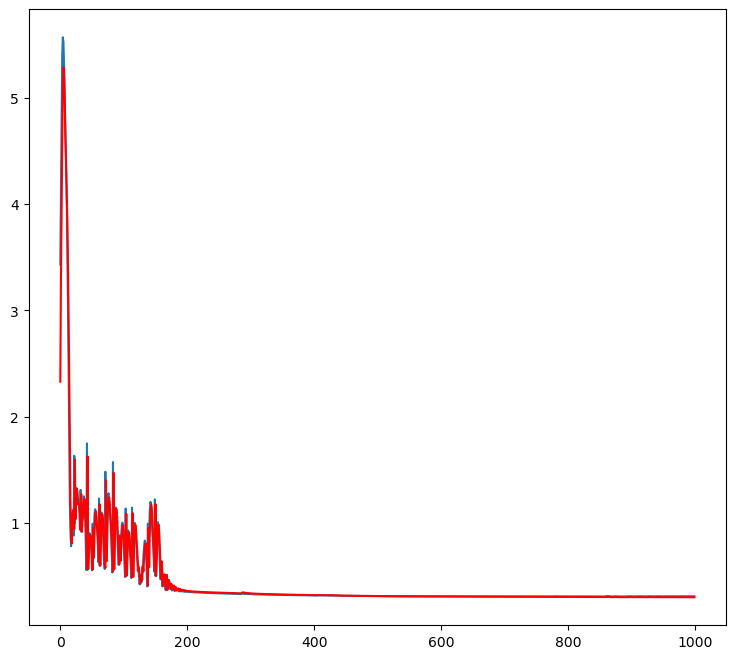

In [210]:
fig = plt.figure(figsize= (9,8))
plt.plot(model_2_df_2['Epoch'], model_2_df_2['Test Loss'])
plt.plot(model_2_df_2['Epoch'], model_2_df_2['Train Loss'], color = 'red')